# NLP Excercises: Explore

In [57]:
#standard DS import
import pandas as pd

#nlp imports
import re
import unicodedata
import nltk

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#custom imports
import env
import acquire as a

### 1. Spam Data

##### a. Load the spam data set.


In [38]:
#### a. Load the spam data set
url = env.create_url("spam_db")
query = 'SELECT * FROM spam'
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [39]:
#### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
# Create function to clean text for nlp
def clean_text(text, extra_stopwords=['r', 'u']):
    '''
    This function takes in text and optional additional stopwords
    then it stems the text, removes stopwords, and removes special characters
    Returning a block of cleaned text
    '''
    #create the stemmer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    #remove special characters
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    #remove special characters using regex
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    #return the cleaned block of text
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [40]:
#clean only ham words
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))

#clean only spam words
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))

#clean all words
all_words = clean_text(' '.join(df['text']))

In [41]:
#count of ham words
ham_counts = pd.Series(ham_words).value_counts()

#count of spam words
spam_counts = pd.Series(spam_words).value_counts()

#count of all words
all_counts = pd.Series(all_words).value_counts()

In [42]:
#Combine the value counts into one dataframe
word_freq = pd.concat([ham_counts, spam_counts, all_counts], axis=1)

#take a look
word_freq.head()

,count,count,count
im,449.0,13.0,462
get,314.0,83.0,397
2,305.0,173.0,478
ltgt,276.0,NaN,276
go,273.0,31.0,304


In [43]:
#Check for nulls
word_freq.isna().sum()

count    1918
count    6087
count       0
dtype: int64

In [44]:
#Rename columns to make more readable
word_freq.columns = ['ham', 'spam', 'all']

#fill null values
word_freq.fillna(0, inplace=True)

#take a look
word_freq.head()

,ham,spam,all
im,449.0,13.0,462
get,314.0,83.0,397
2,305.0,173.0,478
ltgt,276.0,0.0,276
go,273.0,31.0,304


In [45]:
#what datatypes are we working with?
print(word_freq.dtypes)
print('=' * 20)
#Recast all columns as integers
word_freq = word_freq.astype('int')

#take a look
print(word_freq.dtypes)
word_freq.head()

ham     float64
spam    float64
all       int64
dtype: object
ham     int64
spam    int64
all     int64
dtype: object


,ham,spam,all
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276
go,273,31,304


In [46]:
# Create all bigrams for ham and spam
print('Ham Bigrams')
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))
print(ham_bigrams.head())
print('=' * 20)

print('Spam Bigrams')
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))
print(spam_bigrams.head())
print('=' * 20)

# Top 20 most common bigrams
top_20_ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2)).value_counts().head(20)
top_20_spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20)
print(top_20_ham_bigrams)
print(top_20_spam_bigrams)

Ham Bigrams
0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object
Spam Bigrams
0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object
(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(pls, send)        22
(ok, lor)          22
(im, gonna)        20
(happy, new)       19
(ltgt, min)        19
(good, night)      19
(wat, time)        18
(hi, hi)           18
(last, night)      18
(great, day)       17
Name: count, dtype: int64
(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(await, collection)     19
(every, week)           19
(send, stop)            19
(urgent, mobile)       

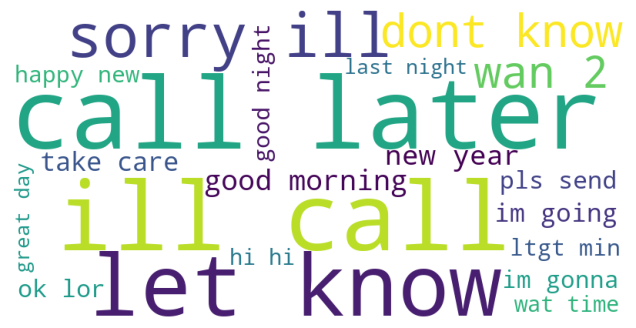

In [47]:
# Word cloud for ham bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

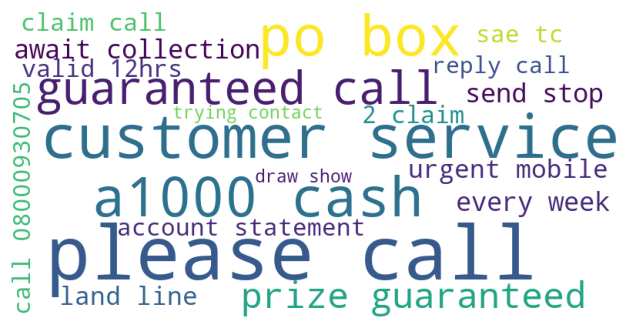

In [48]:
# Word cloud for spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

> 1b. Takeaway: 

##### c. Is there any overlap in the bigrams for the spam data and the ham data? **ANSWER:** NO

In [49]:
spam_bigrams.head(10)

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
5        (win, fa)
6        (fa, cup)
7     (cup, final)
8    (final, tkts)
9     (tkts, 21st)
dtype: object

In [50]:
ham_bigrams.head(10)

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
5            (bugis, n)
6            (n, great)
7        (great, world)
8           (world, la)
9               (la, e)
dtype: object

##### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [54]:
#Trigrams!
print('Ham Trigrams')
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
print(ham_trigrams.head())
print('=' * 20)

print('Spam Trigrams')
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
print(spam_trigrams.head())
print('=' * 20)

# Top 10 most common trigrams
top_10_ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(10)
top_10_spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(10)
print(top_10_ham_trigrams)
print(top_10_spam_trigrams)


Ham Trigrams
0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
dtype: object
Spam Trigrams
0     (free, entry, 2)
1     (entry, 2, wkly)
2      (2, wkly, comp)
3    (wkly, comp, win)
4      (comp, win, fa)
dtype: object
(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(pick, phone, right)    12
(phone, right, pls)     12
(right, pls, send)      12
(hi, hi, hi)            11
(x, x, x)                8
Name: count, dtype: int64
(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(private, 2003, account)      13
(2003, account, statement)    13
(camcorder, reply, call)      12
(show, 800, unredeemed)       12
(guaranteed, a1000, cash)     12
(tone, 4, ur)                 11
Name: count, dtype: int64


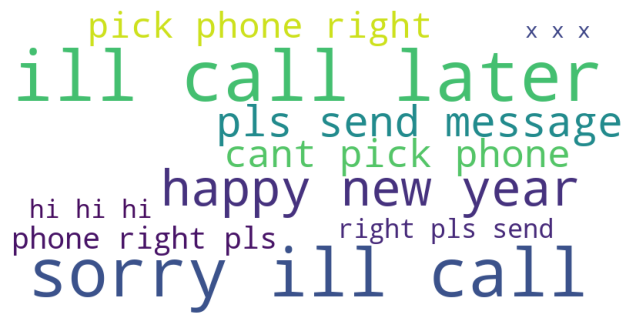

In [55]:
# Word cloud for ham trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_10_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


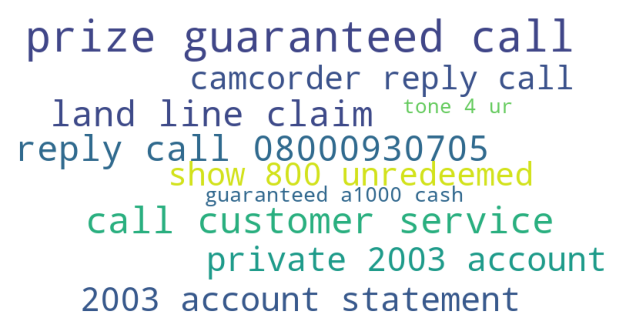

In [56]:
# Word cloud for spam trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_10_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.



In [58]:
df = a.get_blog_articles()

In [59]:
df.head()

,title,article
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...


### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.